In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

os.chdir('/home/fgran/iSpec/')
import ispec
#REMEMBER THAT ISPEC WORKS WITH NANOMETERS D:

In [2]:
#Move to the correct directory: Pristine-UVES
os.chdir('/store/teams/cosmos/fgran/data/Pristine-UVES/')

In [3]:
# uves = pd.read_csv('uves_p111_p112_header_rv.csv')
# p111 = pd.read_csv('ESO_P111_Pristine-Gaia_targets.csv')
# uves = uves.merge(right=p111, on=['source_id'])
uves = pd.read_csv('uves_p111_p112_pristinedr1_xgboost_atm_means_carbon_nitrogen_limits_all_elems.csv')

In [4]:
uves.sort_values(by='monh', inplace=True)

In [5]:
#Plot CaHK lines
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(3933.66, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #CaHK lines
    plt.vlines(3968.47, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #CaHK lines
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(3900, 4000)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/CaHK_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [6]:
#Plot Carbon enhancement region
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    # plt.vlines(3933.66, 0, 35, color='C4') #CaHK lines
    # plt.vlines(3968.47, 0, 35, color='C4') #CaHK lines
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(4100, 4500)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/Carbon1_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [7]:
#Plot Carbon enhancement region
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    # plt.vlines(3933.66, 0, 35, color='C4') #CaHK lines
    # plt.vlines(3968.47, 0, 35, color='C4') #CaHK lines
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(4850, 5200)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/Carbon2_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [8]:
#Plot EuII line @ 4129.70
EuII_line = 4129.70 
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(EuII_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(EuII_line-4., EuII_line+4.)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/EuII_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [9]:
#Plot SrII line @ 4215.52
SrII_line = 4215.52
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(SrII_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(SrII_line-4., SrII_line+4.)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/SrII_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [10]:
#Plot G-band region @ 4304.0 - 4306.1
gband_start = 4304.0
gband_end = 4306.1
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    # plt.vlines(gband_start, 0, 35, color='C4') #Gband start
    # plt.vlines(gband_end, 0, 35, color='C4') #Gband end
    plt.xlabel(r'Wavelength $\AA$', size=14)
    # plt.xlim(gband_start-10., gband_end+10.)
    plt.xlim(4275, 4330)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/Gband_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [11]:
#Plot BaII line @ 4934.07
BaII_line = 4934.07
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(BaII_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(BaII_line-15., BaII_line+15.)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/BaII_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [12]:
#Plot Halpha region @ 656.28 
halpha = 6562.8
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red2_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(halpha-20., halpha+20.)
    plt.ylim(0, spec_list.size+0.2)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/Halpha_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [13]:
#Plot Mg triplet enhancement region
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(5167.322, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #Mg line
    plt.vlines(5172.684, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #Mg line
    plt.vlines(5183.604, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #Mg line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(5160, 5190)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/Mgtriplet_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [14]:
#Plot LiI line @ 6707.764
LiI_line = 6707.764
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeHphot_gen.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red2_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(LiI_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(LiI_line-15., LiI_line+15.)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/LiI_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [6]:
#Plot CN region
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).monh.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    # plt.vlines(3933.66, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #CaHK lines
    # plt.vlines(3968.47, 0, spec_list.size+0.1, color='C4', alpha=0.5, zorder=0) #CaHK lines
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(3860, 3885)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/CN_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [7]:
#Plot O[III] line @ 4934.07
O_line = 6300.5
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).red_file.values
    feh_list = uves.query("run == '%s'" %run).FeH_CaHKsyn_50th.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/red2_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(O_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(O_line-15., O_line+15.)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/OI_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

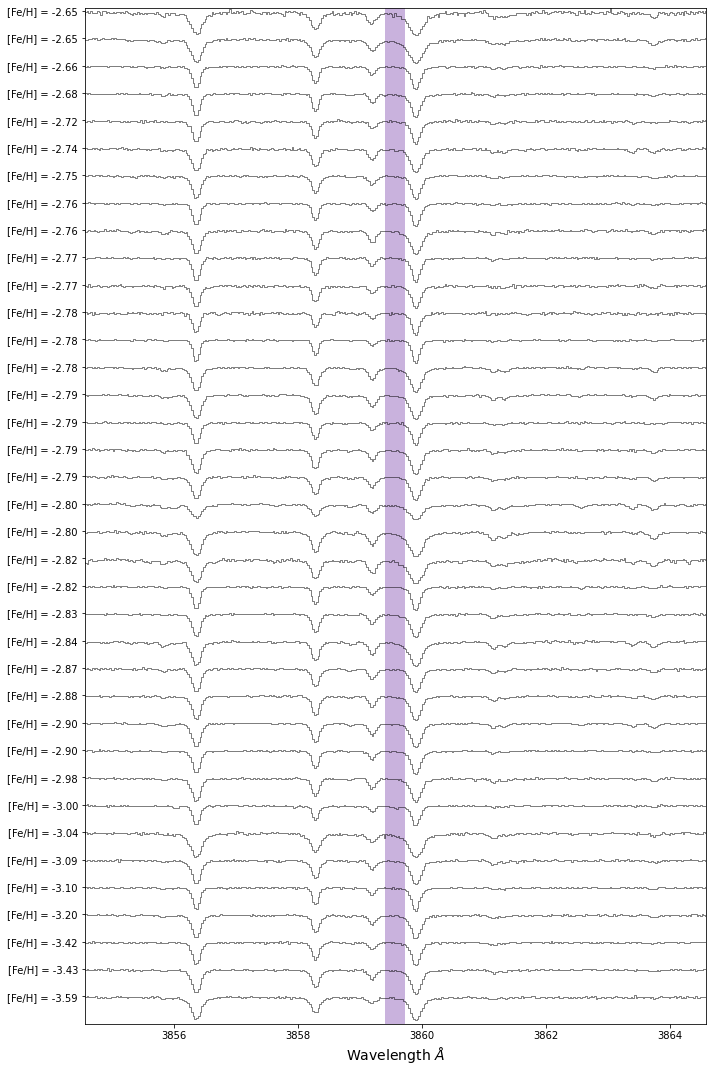

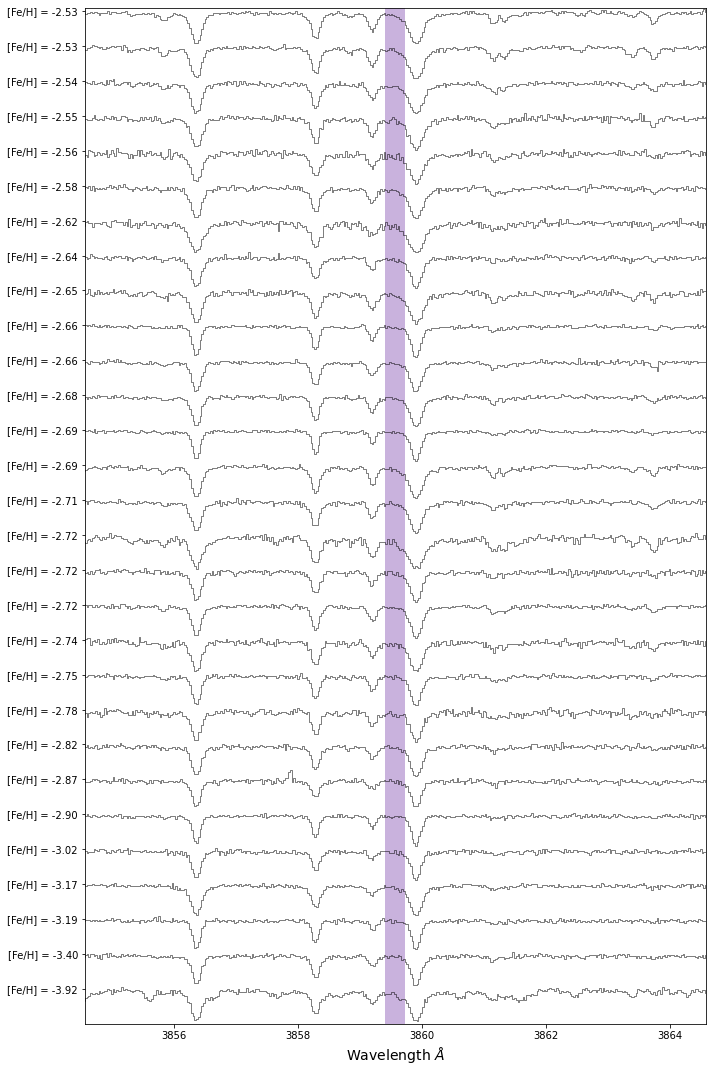

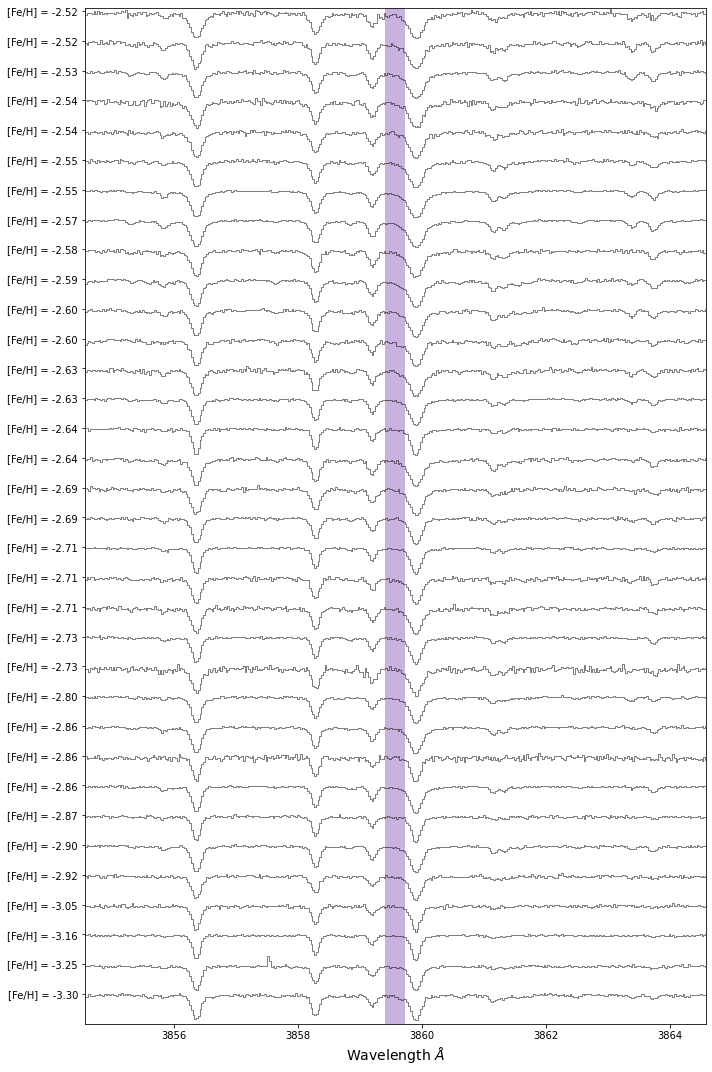

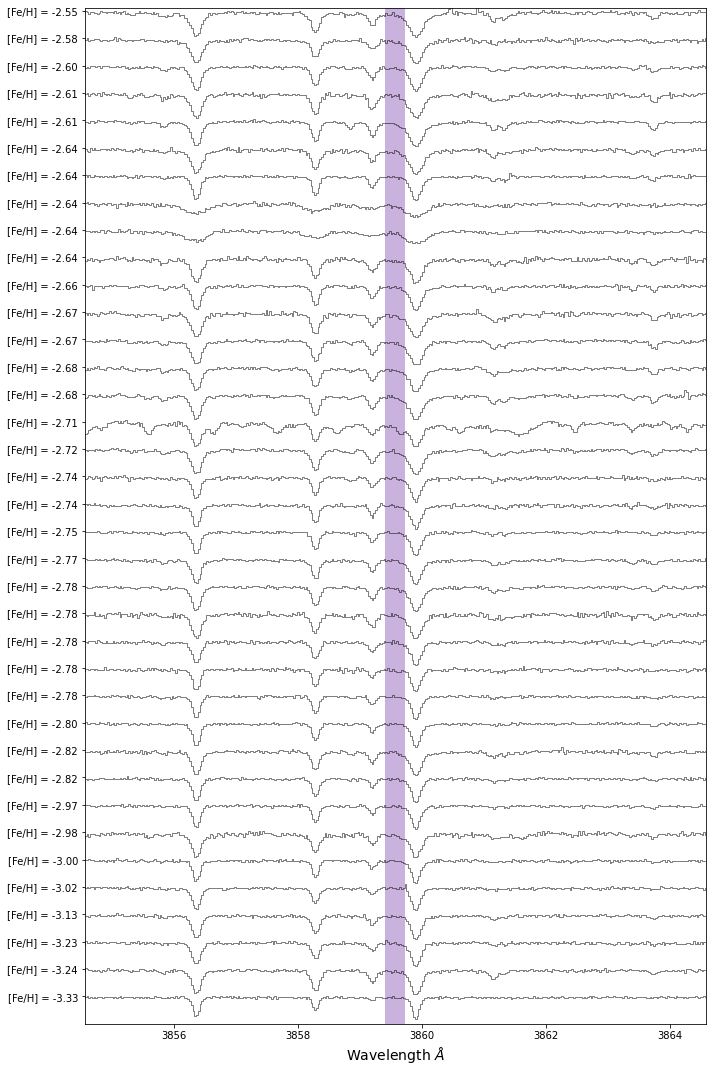

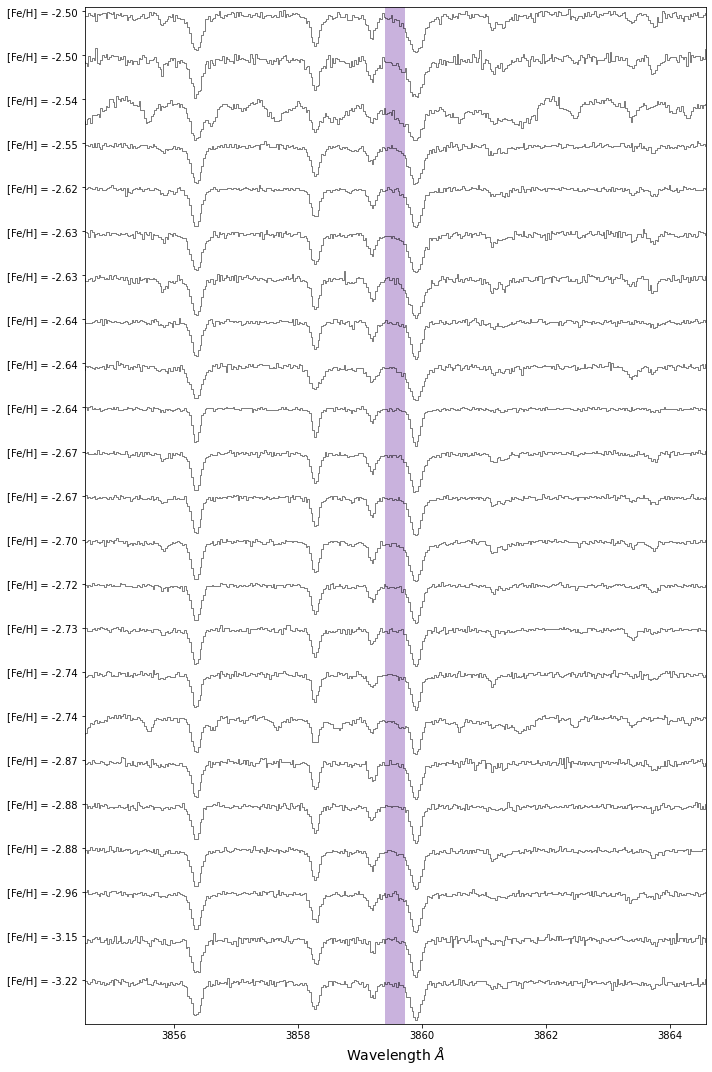

In [10]:
#Plot U II line @ 3859.57
U_line = 3859.57
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.sort_values(by='FeH_CaHKsyn_50th').query("run == '%s'" %run).blue_file.values
    feh_list = uves.sort_values(by='FeH_CaHKsyn_50th').query("run == '%s'" %run).FeH_CaHKsyn_50th.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue2_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(U_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #U II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(U_line-5, U_line+5)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/UII_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.show()

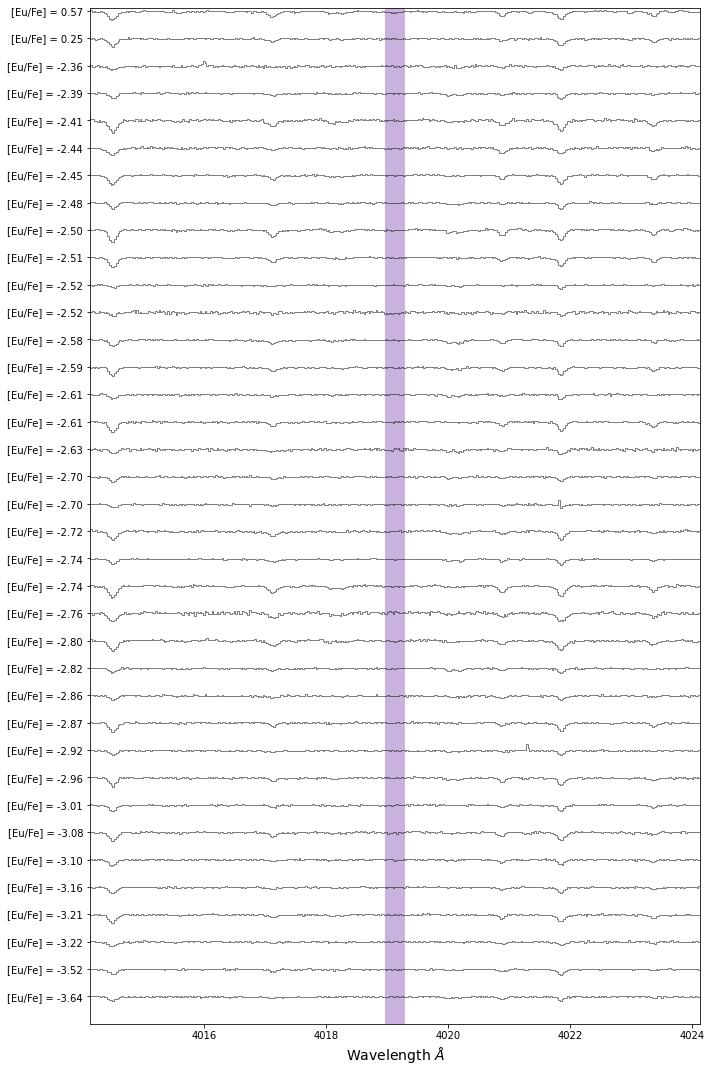

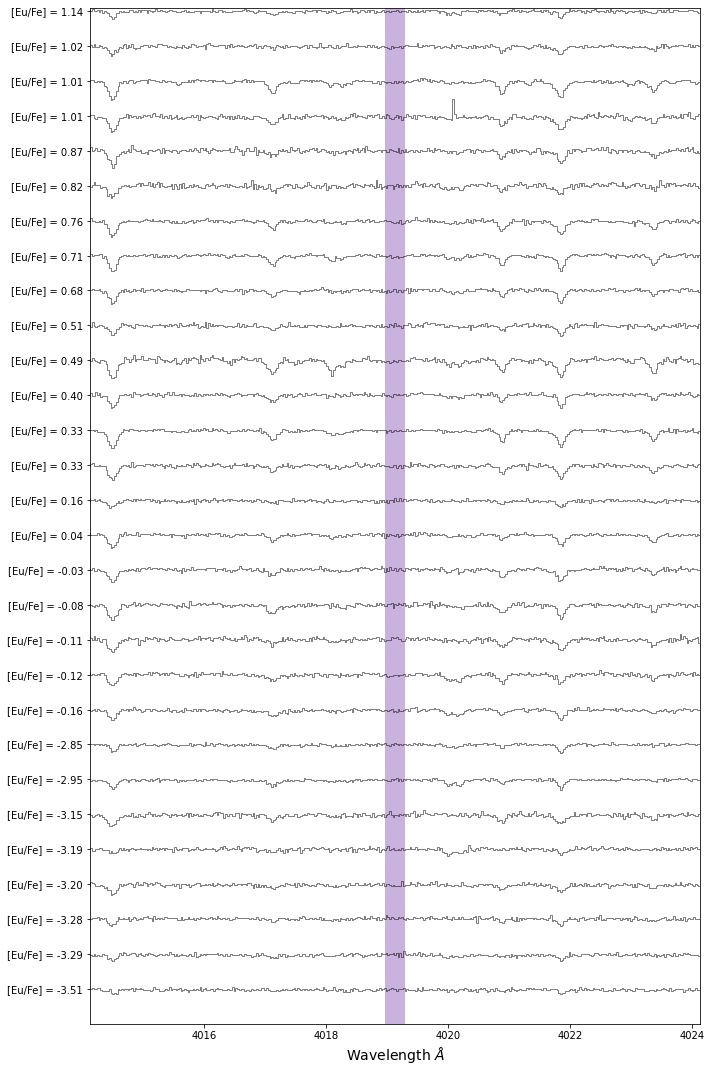

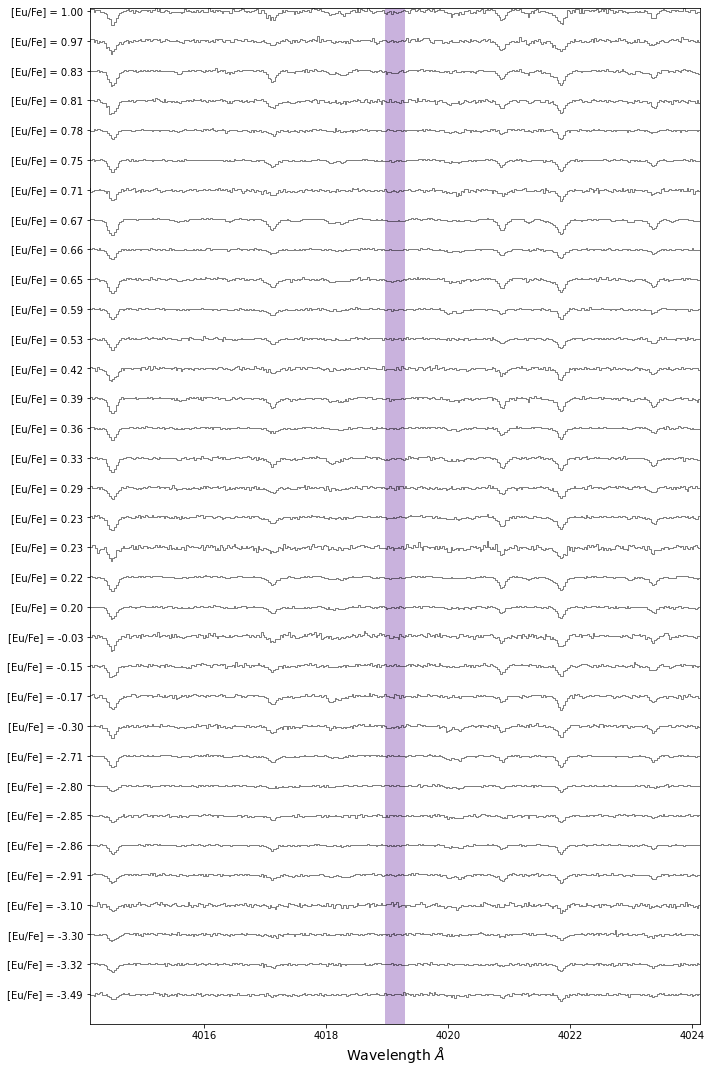

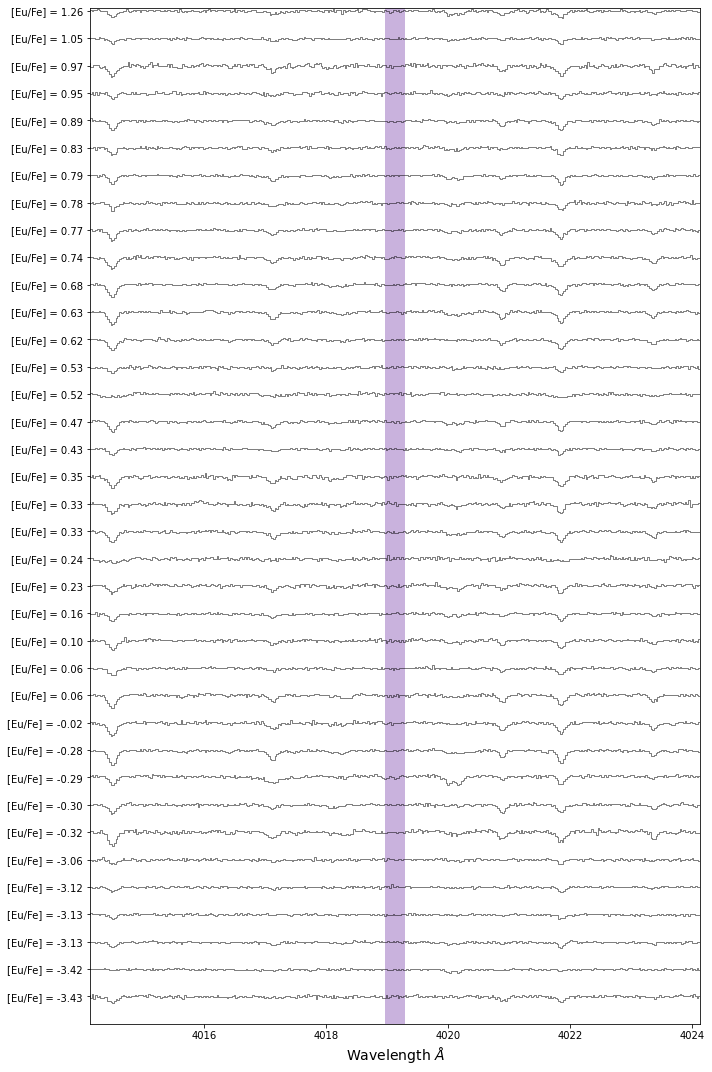

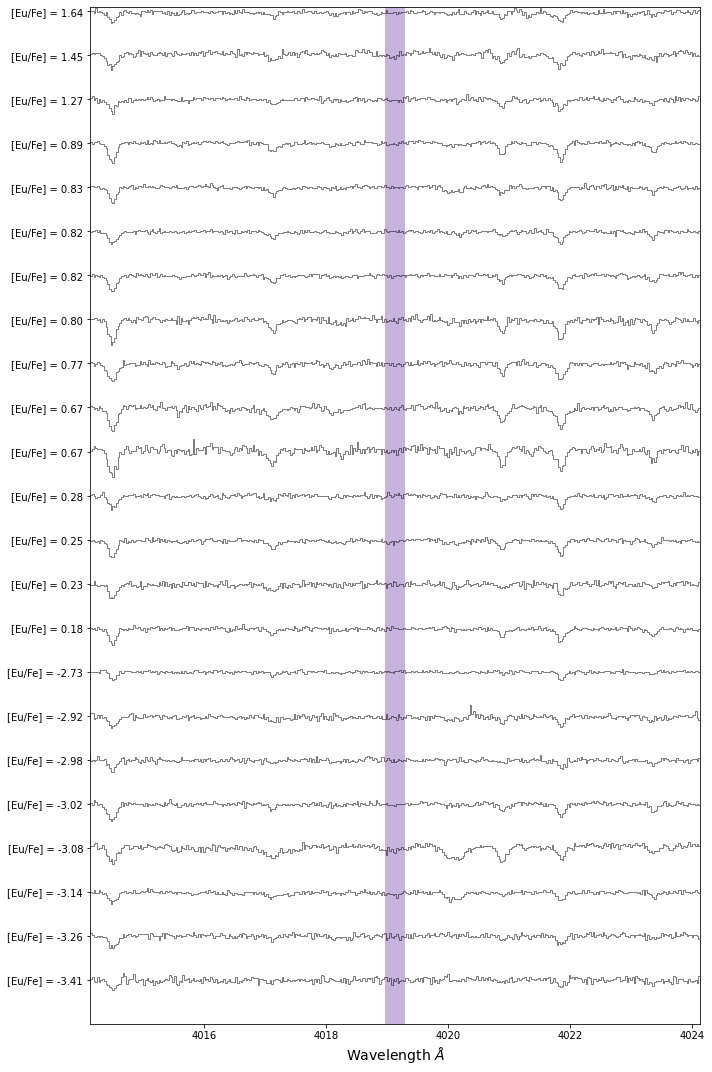

In [8]:
### Plot Th II line @ 4019.13
Th_line = 4019.13
for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.sort_values(by='eufe').query("run == '%s'" %run).blue_file.values
    feh_list = uves.sort_values(by='eufe').query("run == '%s'" %run).eufe.values
    feh_list = ['[Eu/Fe] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(10,15))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')

    plt.vlines(Th_line, 0, spec_list.size+1, color='C4', lw=20, alpha=0.5, zorder=0) #U II line
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(Th_line-5, Th_line+5)
    plt.ylim(0, spec_list.size+0.1)
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size+1, step=1), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/ThII_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.show()

In [48]:
#Plot 12C/13C region
C13_line_1 = 4230.25
C13_line_2 = 4231.40

C12_line_1 = 4229.85
C12_line_2 = 4231.05

for n_run, run in enumerate(uves.run.unique()):
    
    spec_list = uves.query("run == '%s'" %run).blue_file.values
    feh_list = uves.query("run == '%s'" %run).monh.values
    feh_list = ['[Fe/H] = %01.2f' %feh for feh in feh_list]

    plt.figure(figsize=(4,10))

    for i, spec in enumerate(spec_list):
        spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run, spec))
        plt.plot(spec.waveobs*10., spec.flux + i/2., lw=0.5, color='k')


    plt.vlines(C12_line_1, 0, spec_list.size/2.+1, color='C4', lw=10, alpha=0.5, zorder=0) #13C line
    plt.vlines(C12_line_2, 0, spec_list.size/2.+1, color='C4', lw=10, alpha=0.5, zorder=0) #13C line
    plt.vlines(C13_line_1, 0, spec_list.size/2.+1, color='C2', lw=10, alpha=0.5, zorder=0) #13C line
    plt.vlines(C13_line_2, 0, spec_list.size/2.+1, color='C2', lw=10, alpha=0.5, zorder=0) #13C line
    
    plt.xlabel(r'Wavelength $\AA$', size=14)
    plt.xlim(4229.6, 4231.8) #12C/13C
    plt.ylim(0., spec_list.size/2.+0.8)
    
    plt.text(C12_line_1-0.05, 0.2, s=r'$^{12}C$', size=8, rotation=90)
    plt.text(C12_line_2-0.05, 0.2, s=r'$^{12}C$', size=8, rotation=90)
    plt.text(C13_line_1-0.05, 0.2, s=r'$^{13}C$', size=8, rotation=90)
    plt.text(C13_line_2-0.05, 0.2, s=r'$^{13}C$', size=8, rotation=90)
    
    plt.yticks(ticks=np.arange(start=1, stop=spec_list.size/2+1, step=1/2), labels=feh_list)
    plt.tight_layout()
    plt.savefig('plots/spectral_regions/C12C13_%s.pdf' %run.replace('.','_'), dpi=300)
    plt.close()

In [30]:
!pwd

/misc/store/teams/cosmos/fgran/data/Pristine-UVES


In [ ]:
plots/spectral_regions/C12C13

In [3]:
#FeH plots

In [4]:
atm = pd.read_csv('UVES_params.csv')

In [5]:
f_vmac = (atm.vmac.values < 10.) & (atm.vmac.values != 0.0) & (atm.vmac.values != 5.0)
atm = atm[f_vmac]

In [6]:
atm = atm.sort_values(by='feh')
atm.reset_index(inplace=True)

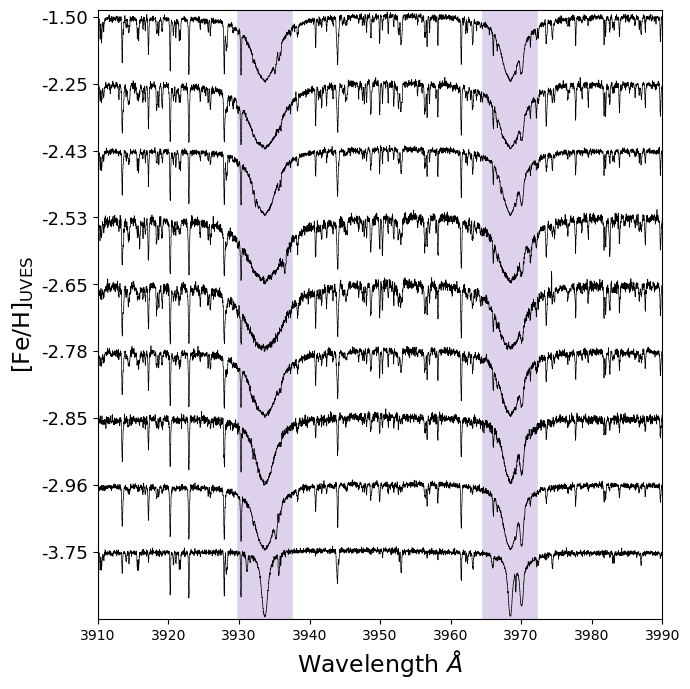

In [7]:
plt.figure(figsize=(7,7))
i = 0
each = 15
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(star.run, star.blue_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')
    i = i + 1

plt.vlines(3933.66, 0, len(feh_list)+0.1, color='C4', alpha=0.3, zorder=0, lw=40) #CaHK lines
plt.vlines(3968.47, 0, len(feh_list)+0.1, color='C4', alpha=0.3, zorder=0, lw=40) #CaHK lines
plt.xlabel(r'Wavelength $\AA$', size=17)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(3910, 3990)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/FeH_sorted_CaHK.png', dpi=600)
plt.show()

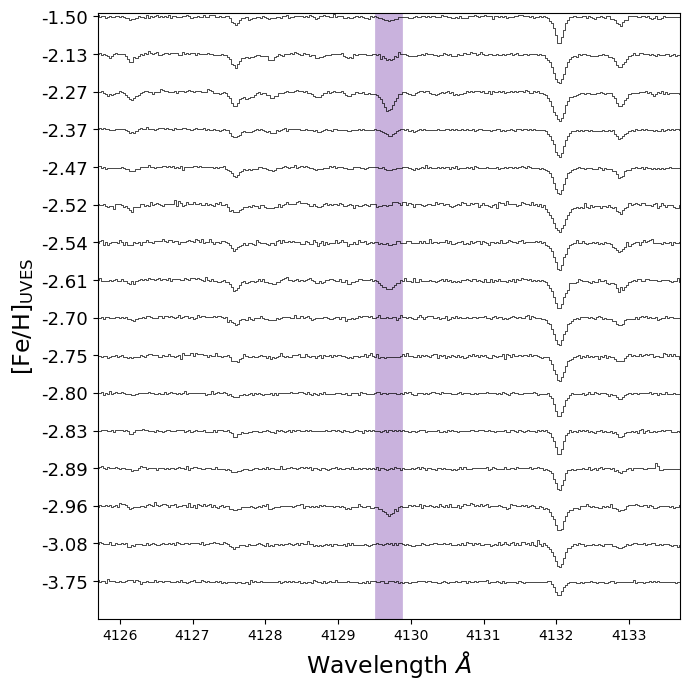

In [8]:
#Plot EuII line @ 4129.70
EuII_line = 4129.70 

plt.figure(figsize=(7,7))
i = 0
each = 8
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[0::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(star.run, star.blue_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')
    i = i + 1

plt.vlines(EuII_line, 0, len(feh_list)+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
plt.xlabel(r'Wavelength $\AA$', size=17)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(EuII_line-4., EuII_line+4.)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/Eu_FeH_sorted_CaHK.png', dpi=600)
plt.show()

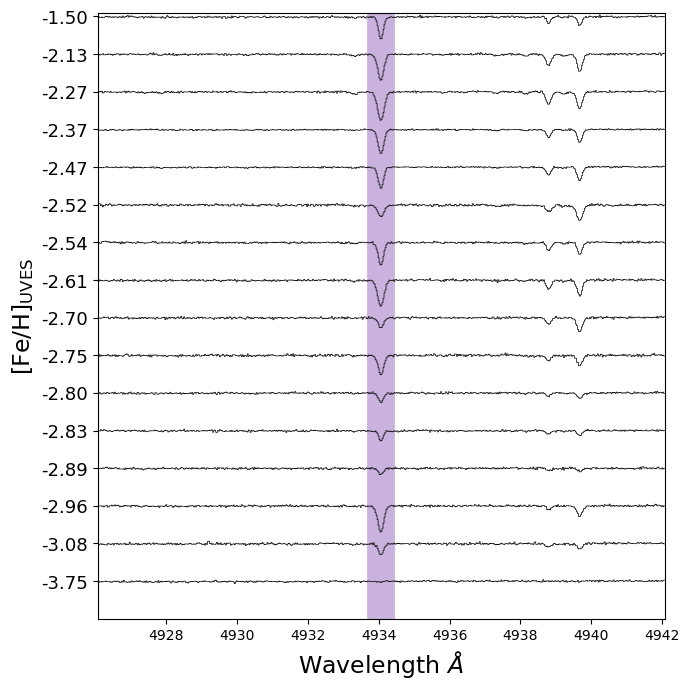

In [9]:
#Plot BaII line @ 4934.07
BaII_line = 4934.07

plt.figure(figsize=(7,7))
i = 0
each = 8
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[0::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(star.run, star.red_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')
    i = i + 1

plt.vlines(BaII_line, 0, len(feh_list)+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
plt.xlabel(r'Wavelength $\AA$', size=17)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(BaII_line-8., BaII_line+8.)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/Ba_FeH_sorted_CaHK.png', dpi=600)
plt.show()

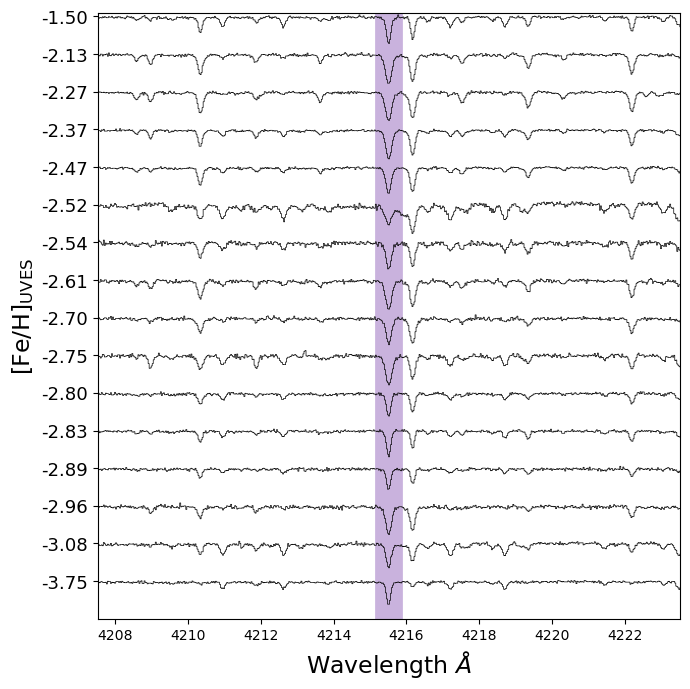

In [10]:
#Plot SrII line @ 4215.52
SrII_line = 4215.52

plt.figure(figsize=(7,7))
i = 0
each = 8
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[0::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(star.run, star.blue_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k') 
    i = i + 1

plt.vlines(SrII_line, 0, len(feh_list)+1, color='C4', lw=20, alpha=0.5, zorder=0) #Eu II line
plt.xlabel(r'Wavelength $\AA$', size=17)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(SrII_line-8., SrII_line+8.)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/Sr_FeH_sorted_CaHK.png', dpi=600)
plt.show()

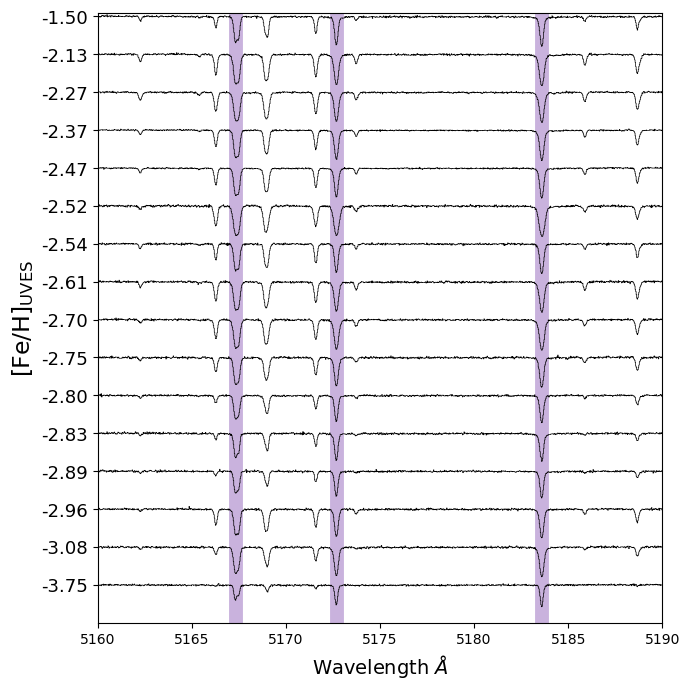

In [11]:
#Mg triplet

plt.figure(figsize=(7,7))
i = 0
each = 8
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[0::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(star.run, star.red_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k') 
    i = i + 1

    
plt.vlines(5167.322, 0, len(feh_list)+0.1, color='C4', alpha=0.5, zorder=0, lw=10) #Mg line
plt.vlines(5172.684, 0, len(feh_list)+0.1, color='C4', alpha=0.5, zorder=0, lw=10) #Mg line
plt.vlines(5183.604, 0, len(feh_list)+0.1, color='C4', alpha=0.5, zorder=0, lw=10) #Mg line
plt.xlabel(r'Wavelength $\AA$', size=14)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(5160, 5190)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/Mg_FeH_sorted_CaHK.png', dpi=600)
plt.show()

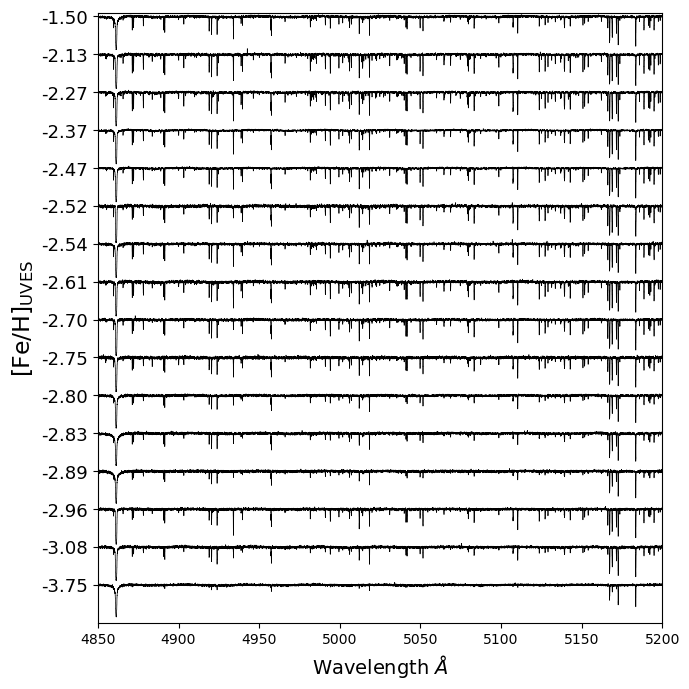

In [12]:
#Carbon regions

plt.figure(figsize=(7,7))
i = 0
each = 8
feh_list = ['%2.2f' %x for x in np.round(atm.feh.values[0::each], 2)]
for i_star, star in atm.iterrows():
    
    # if (i%3 == 1) | (i%3 == 2):
    #     continue
    if i_star%each != 0:
        # i = i + 1
        continue
    
    spec = ispec.read_spectrum('norm_RV_corr/%s/red1_%s' %(star.run, star.red_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k') 
    i = i + 1

plt.xlabel(r'Wavelength $\AA$', size=14)
plt.ylabel(r'[Fe/H]$_{\rm UVES}$', size=17)
plt.xlim(4850, 5200)
plt.ylim(0, len(feh_list)+0.1)
plt.yticks(ticks=np.arange(start=1, stop=len(feh_list)+1, step=1), labels=feh_list, size=13)
plt.tight_layout()
plt.savefig('plots/spectral_regions/C_FeH_sorted_CaHK.png', dpi=600)
plt.show()